In [2]:
import numpy as np 
import pandas as pd 
from sklearn.svm import SVC# SVM
from sklearn.model_selection import train_test_split # ホールドアウト法
from sklearn.model_selection import KFold # 交差検証法
from sklearn.metrics import mean_absolute_error # 回帰問題における性能評価
from sklearn.linear_model import LinearRegression #線形回帰
from sklearn.feature_selection import RFECV #ステップワイズ法
from sklearn.linear_model import LogisticRegression #ロジスティック回帰 

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt #プロット
from sklearn.linear_model import SGDClassifier #確率的勾配降下法
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix#, precision_recall_fscore_support
#accuracy_score=精度分類スコア
#confusion_matrix=混同行列

In [5]:
df = pd.read_csv()

# 前処理

In [6]:
#データをランダムに抽出(元データが大きすぎるため)
df=df.sample(frac=0.1,random_state=1234)

In [7]:
#欠損値削除
df= df.dropna(how='any')

In [8]:
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
77536,1394440984,Lake Effect,Shorts,Film & Video,USD,2011-11-18,8000.0,2011-10-28 00:24:58,8000.00,successful,29,US,8000.00,8000.00,8000.00
63520,1323037478,Headhunt Revisited Documentary - Art Celebrati...,Documentary,Film & Video,USD,2014-05-06,35000.0,2014-04-06 20:13:07,37420.00,successful,172,US,37420.00,37420.00,35000.00
376632,989665819,Project: U make COLOSSAL Cones,Food,Food,USD,2012-06-16,3000.0,2012-04-18 05:57:55,105.00,failed,2,US,105.00,105.00,3000.00
282839,509176684,"Torches New Album ""The Friction""",Music,Music,USD,2013-04-13,7000.0,2013-02-12 19:56:50,735.00,failed,25,US,735.00,735.00,7000.00
286484,527368001,Thomas Edmund's Debut Album (EP),Music,Music,GBP,2014-01-20,700.0,2013-12-21 20:01:38,0.00,failed,0,GB,0.00,0.00,1155.57
357089,889098539,America's Broadcast Pioneer: WGPR-TV62,Journalism,Journalism,USD,2015-11-28,10000.0,2015-09-29 04:47:19,10156.00,successful,33,US,10156.00,10156.00,10000.00
11624,1058240403,Tucson Hop Shop...Your Craft Beer Destination.,Drinks,Food,USD,2015-07-23,10000.0,2015-07-08 14:39:07,13763.00,successful,82,US,13763.00,13763.00,10000.00
171126,1870446255,Into War - Developed by one Person.,Video Games,Games,USD,2013-07-06,15000.0,2013-06-06 20:12:31,25.00,canceled,1,US,25.00,25.00,15000.00
350151,853812245,Once Upon A Time In The Hindu Kush,Shorts,Film & Video,USD,2014-01-05,76000.0,2013-12-06 02:25:35,30.00,failed,1,US,30.00,30.00,76000.00
276832,478415344,iHomeRegistry - Create Your Perfect Space!,Interactive Design,Design,USD,2016-10-13,50000.0,2016-09-13 19:14:23,0.00,failed,0,US,0.00,0.00,50000.00


In [9]:
y_col = 'state'

x_cols = ['category','main_category','currency','country']

#説明変数を、ダミー変数にする
X = pd.get_dummies(df[x_cols])#drop_first=True

#目的変数を successfulのフラグに変更
y = pd.get_dummies(df[y_col])['successful']

In [10]:
# 全データのうち、20%をテストデータにする
test_size = 0.2

# データを分割（テストデータはランダム選択）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) 

# ステップワイズ法

In [11]:
# estimatorにモデルをセット
estimator = SGDClassifier(loss="log")

# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
#今回は回帰なのでneg_mean_absolute_errorを評価指標に指定（分類ならaccuracy）cv=クロスバリデーション
rfecv = RFECV(estimator, cv=10, scoring='accuracy')#再帰的な機能の削除と、最適な数の機能の相互検証された選択による機能のランキング。

In [12]:
#ダミー変数に変換したX,yの要素を取得
X = X_train.values
y = y_train.values

In [13]:
rfecv.fit(X, y)

RFECV(cv=10,
      estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                              early_stopping=False, epsilon=0.1, eta0=0.0,
                              fit_intercept=True, l1_ratio=0.15,
                              learning_rate='optimal', loss='log',
                              max_iter=1000, n_iter_no_change=5, n_jobs=None,
                              penalty='l2', power_t=0.5, random_state=None,
                              shuffle=True, tol=0.001, validation_fraction=0.1,
                              verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

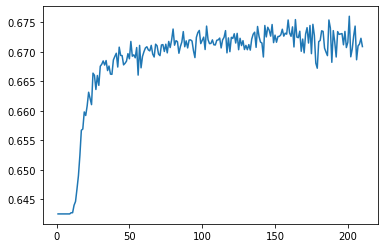

In [14]:
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [15]:
# rfecv.support_でランキング1位以外はFalseとするindexを取得できる
# Trueになっている特徴を使用すれば汎化誤差は最小となる
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,

In [16]:
# bool型の配列に ~ をつけるとTrueとFalseを反転させることができる
# ここでTrueになっている特徴が削除してもよい特徴
remove_idx = ~rfecv.support_
remove_idx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [17]:
# 削除してもよい特徴の名前を取得する
remove_feature = X_train.columns[remove_idx]
remove_feature

Index(['category_Civic Design', 'category_Flight', 'category_Music',
       'category_Music Videos', 'category_Pet Fashion', 'category_Pop',
       'category_Radio & Podcasts', 'category_Taxidermy', 'main_category_Art'],
      dtype='object')

In [18]:
# drop関数で特徴を削除
selected_X_train= X_train.drop(remove_feature, axis=1)
selected_X_train

,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
140718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
224670,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
173908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
254638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
80320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
65507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 説明変数が210から201に変化（9個削減された。）

# 決定木

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#X_train = df[["x1","x2"]].values
#y_train = df["label"].values
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_split=2, min_samples_leaf=2, random_state=1234)
clf = clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))
#print(clf.predict(X_test)) #予測したい場合,結果が不満

score= 0.6543884796159872


In [18]:
# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.20856674 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

# ランダムフォレスト

In [19]:
from sklearn.ensemble import RandomForestClassifier

#X_train = iris.data
#y_train = iris.target

clf = RandomForestClassifier(n_estimators=10, max_depth=2, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))

# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
#print(clf.feature_importances_)
#pd.DataFrame(clf.feature_importances_, index=iris.feature_names).plot.bar(figsize=(7,2))
#plt.ylabel("Importance")
#plt.xlabel("Features")
#plt.show()

score= 0.6425547518250608


In [ ]:
#ランダムフォレストよりも決定木のほうが精度が高い。

# DNN

In [49]:
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense, Dropout, Activation
from tensorflow.compat.v1.keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam

In [50]:
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=210))
model.add(Dense(5, activation='relu', input_dim=6))
model.add(Dense(2, activation='softmax'))#最終層のactivationは変更しないこと

In [51]:
# ------ 最適化手法 ------
sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
# rms = RMSprop(lr=0.01)
# adag = Adagrad(lr=0.01)
# adad = Adadelta(lr=0.01)
# adam = Adam(lr=0.01)
# -----------------------------

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [52]:
# 計算の実行
fit = model.fit(X_train, y_train,
          epochs=50,
          batch_size=20,validation_data=(X_test, y_test))

Train on 24000 samples, validate on 5999 samples
Epoch 1/50
24000/24000 [==============================] - 1s 45us/sample - loss: 0.6353 - acc: 0.6485 - val_loss: 0.6183 - val_acc: 0.6489
Epoch 2/50
24000/24000 [==============================] - 1s 41us/sample - loss: 0.6141 - acc: 0.6692 - val_loss: 0.6156 - val_acc: 0.6638
Epoch 3/50
24000/24000 [==============================] - 1s 40us/sample - loss: 0.6104 - acc: 0.6734 - val_loss: 0.6100 - val_acc: 0.6654
Epoch 4/50
24000/24000 [==============================] - 1s 41us/sample - loss: 0.6089 - acc: 0.6737 - val_loss: 0.6105 - val_acc: 0.6738
Epoch 5/50
24000/24000 [==============================] - 1s 40us/sample - loss: 0.6071 - acc: 0.6746 - val_loss: 0.6067 - val_acc: 0.6706
Epoch 6/50
24000/24000 [==============================] - 1s 49us/sample - loss: 0.6055 - acc: 0.6761 - val_loss: 0.6070 - val_acc: 0.6751
Epoch 7/50
24000/24000 [==============================] - 1s 45us/sample - loss: 0.6049 - acc: 0.6760 - val_loss: 0.6

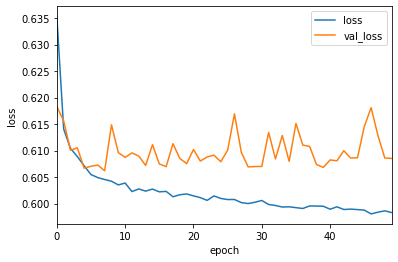

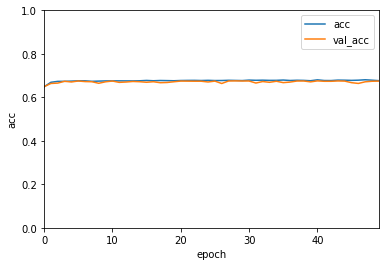

In [53]:
# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

In [ ]:
#過学習を起こしている。

# ロジスティック回帰

In [34]:
#ロジスティック回帰  
clf = SGDClassifier(loss='log', penalty='none', max_iter=100, fit_intercept=True, random_state=1234)

#clf.fit(X_test, y_test) 使わない
clf.fit(selected_X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
              n_iter_no_change=5, n_jobs=None, penalty='none', power_t=0.5,
              random_state=1234, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
# ラベルを予測
y_est = clf.predict(selected_X_train)

# 対数尤度
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -11.125
正答率 = 67.789%


In [ ]:
#ステップワイズ法によって新たに作った、説明変数の集合をselected_X_train
#としてX_trainの変わりに使用したが、精度が下がった。
#対数前処理が、-11.122→　-11.125
#accuracyが、67.799%→　67.789%

In [65]:
#混同行列を作成
tn, fp, fn, tp = confusion_matrix(y, y_est).ravel()
print(fn, fp)
print(tn, tp)

#'Accuracy、Recall、Precisionを求めて表示
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp))) 

7665 2071
17205 3058
Accuracy  = 67.546%
Recall    = 28.518%
Precision = 59.622%



# クロスバリデーション

In [36]:
cross_valid_mae = 0
split_num = 1

In [38]:
# テスト役を交代させながら学習と評価を繰り返す #KFoldに注意
for train_idx, test_idx in KFold(n_splits=5, shuffle=True, random_state=1234).split(X, y):#Kfold インデックスを生成する
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    # 学習用データを使って線形回帰モデルを学習
    regr = SGDClassifier(fit_intercept=True)
    regr.fit(X_train, y_train)

    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test)

In [39]:
# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_pred_test)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test,y_pred_test)))

対数尤度 = -11.290
正答率 = 67.311%


# SVM 

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
#from common_func import plot_decision_regions
import seaborn as sns

In [41]:
# SVMの実行
C = 1
kernel = "rbf"#ガウスカーネル
gamma = 1
clf = SVC(C=C, kernel=kernel, gamma=gamma)
clf.fit(X_train, y_train)

print("識別精度=",clf.score(X_train, y_train))#スコア（平均accuracy）
print("識別精度=",clf.score(X_test, y_test))
#識別制度を計測するときに与える値は、訓練データ？テストデータ？(多分テストデータ)
#(X_test, y_test) 識別精度= 0.6709451575262544

識別精度= 0.6891666666666667
識別精度= 0.6709451575262544
